# Prep Data

In [60]:
from string import ascii_letters
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_excel('../Data/Bloomberg Data_Template_190625 for send.xlsx')

In [62]:
df.head()

,CO1 Comdty,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1041,Unnamed: 1042,Unnamed: 1043,Unnamed: 1044,Unnamed: 1045,Unnamed: 1046,Unnamed: 1047,Unnamed: 1048,Unnamed: 1049,Unnamed: 1050
0,CO2 Comdty,NaN,NaN,NaN,CO1 Comdty,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,JPYUSD Curncy,NaN,NaN,NaN,NaN,NaN,NaN
1,CO3 Comdty,NaN,NaN,NaN,Dates,PX_LAST,PX_VOLUME,PX_SETTLE,OPEN_INT,CHG_NET_1D,...,CHG_NET_1D,CHG_PCT_1D,NaN,Dates,PX_LAST,PX_VOLUME,PX_SETTLE,OPEN_INT,CHG_NET_1D,CHG_PCT_1D
2,CO4 Comdty,NaN,NaN,NaN,NaN,66.87,157948,66.87,652480,0.15,...,0.0007,0.0583,NaN,NaN,0.008876,NaN,NaN,NaN,2e-06,0.0225
3,PVMMDS12 Index,NaN,NaN,NaN,2018-01-02 00:00:00,66.57,211739,66.57,631709,-0.3,...,0.0047,0.3913,NaN,2018-01-02 00:00:00,0.008906,NaN,NaN,NaN,3e-05,0.338
4,PVMMDS23 Index,NaN,NaN,NaN,2018-01-03 00:00:00,67.84,260862,67.84,619637,1.27,...,-0.0044,-0.3649,NaN,2018-01-03 00:00:00,0.008888,NaN,NaN,NaN,-1.8e-05,-0.2021


In [63]:
df.drop(['CO1 Comdty','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=1,inplace=True)

In [64]:
colsname=list(df)

In [65]:
def change_list_name(listname):
    i = 0
    for x in listname:
        listname[i]=str(i)
        i += 1
    return listname

In [66]:
df.columns = change_list_name(colsname)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046
0,CO1 Comdty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO2 Comdty,NaN,...,NaN,NaN,NaN,JPYUSD Curncy,NaN,NaN,NaN,NaN,NaN,NaN
1,Dates,PX_LAST,PX_VOLUME,PX_SETTLE,OPEN_INT,CHG_NET_1D,CHG_PCT_1D,NaN,Dates,PX_LAST,...,CHG_NET_1D,CHG_PCT_1D,NaN,Dates,PX_LAST,PX_VOLUME,PX_SETTLE,OPEN_INT,CHG_NET_1D,CHG_PCT_1D
2,NaN,66.87,157948,66.87,652480,0.15,0.22,NaN,NaN,66.44,...,0.0007,0.0583,NaN,NaN,0.008876,NaN,NaN,NaN,2e-06,0.0225
3,2018-01-02 00:00:00,66.57,211739,66.57,631709,-0.3,-0.45,NaN,2018-01-02 00:00:00,66.13,...,0.0047,0.3913,NaN,2018-01-02 00:00:00,0.008906,NaN,NaN,NaN,3e-05,0.338
4,2018-01-03 00:00:00,67.84,260862,67.84,619637,1.27,1.91,NaN,2018-01-03 00:00:00,67.29,...,-0.0044,-0.3649,NaN,2018-01-03 00:00:00,0.008888,NaN,NaN,NaN,-1.8e-05,-0.2021


In [68]:
drop_name = []
old_list = list(range(2,8))
for x in range(130):
    temp_list = list(range(2,8))
    temp_list = [i+(x*8) for i in old_list]
    drop_name.extend(temp_list)

In [69]:
for x in drop_name:
    str_list = [str(i) for i in drop_name]

In [70]:
df.drop(labels=str_list,axis=1,inplace=True)

In [71]:
#Drop unneeded field
df.drop(['1042','1043','1044','1045','1046'],axis=1,inplace=True)

In [72]:
df.head()

,0,1,8,9,16,17,24,25,32,33,...,1008,1009,1016,1017,1024,1025,1032,1033,1040,1041
0,CO1 Comdty,NaN,CO2 Comdty,NaN,CO3 Comdty,NaN,CO4 Comdty,NaN,PVMMDS12 Index,NaN,...,CFCDPMMD Index,NaN,OISTCRDE Index,NaN,GBPUSD Curncy,NaN,EURUSD Curncy,NaN,JPYUSD Curncy,NaN
1,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST,...,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST,Dates,PX_LAST
2,NaN,66.87,NaN,66.44,NaN,66.09,NaN,65.78,NaN,0.67,...,NaN,50334,NaN,2464,NaN,1.3503,NaN,1.2012,NaN,0.008876
3,2018-01-02 00:00:00,66.57,2018-01-02 00:00:00,66.13,2018-01-02 00:00:00,65.79,2018-01-02 00:00:00,65.51,2018-01-02 00:00:00,0.25,...,2018-01-02 00:00:00,47687,2018-01-02 00:00:00,2480,2018-01-02 00:00:00,1.359,2018-01-02 00:00:00,1.2059,2018-01-02 00:00:00,0.008906
4,2018-01-03 00:00:00,67.84,2018-01-03 00:00:00,67.29,2018-01-03 00:00:00,66.9,2018-01-03 00:00:00,66.57,2018-01-03 00:00:00,0.26,...,2018-01-03 00:00:00,47687,2018-01-03 00:00:00,2526,2018-01-03 00:00:00,1.3516,2018-01-03 00:00:00,1.2015,2018-01-03 00:00:00,0.008888


In [73]:
df.index

RangeIndex(start=0, stop=389, step=1)

In [74]:
old_list = [0]
new_list = [x+(129*8) for x in old_list]

In [75]:
drop_name = []
for x in range(130):
    temp_list = list(range(2,8))
    temp_list = [i+(x*8) for i in old_list]
    drop_name.extend(temp_list)

In [76]:
for x in drop_name:
    str_list = [str(i) for i in drop_name]

In [77]:
df.drop(labels=str_list,axis=1,inplace=True)

In [78]:
df.drop(['1040'],axis=1,inplace=True)

In [79]:
df.head()

,1,9,17,25,33,41,49,57,65,73,...,969,977,985,993,1001,1009,1017,1025,1033,1041
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,...,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2,66.87,66.44,66.09,65.78,0.67,0.23,0.39,0.21,3.12,61.55,...,57356,33761,37907,73,377566,50334,2464,1.3503,1.2012,0.008876
3,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.359,1.2059,0.008906
4,67.84,67.29,66.9,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888


In [80]:
df2 =pd.read_csv('../Data/Index.csv')

In [81]:
df2.head()

,Index Name,Date
0,CO1 Comdty,2/1/2018
1,CO2 Comdty,3/1/2018
2,CO3 Comdty,4/1/2018
3,CO4 Comdty,5/1/2018
4,PVMMDS12 Index,8/1/2018


In [82]:
price_index = list(df2['Index Name'])
date_index = list(df2['Date'])

In [83]:
price_index = [price_index for price_index in price_index if str(price_index) != 'nan']

In [84]:
df.columns = price_index

In [85]:
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,...,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2,66.87,66.44,66.09,65.78,0.67,0.23,0.39,0.21,3.12,61.55,...,57356,33761,37907,73,377566,50334,2464,1.3503,1.2012,0.008876
3,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.359,1.2059,0.008906
4,67.84,67.29,66.9,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888


In [86]:
df.drop([0,1],inplace=True)

In [87]:
df.drop([2],inplace=True)

In [88]:
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
3,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.359,1.2059,0.008906
4,67.84,67.29,66.9,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
5,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.3,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
6,67.62,67.1,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
7,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 3 to 388
Columns: 131 entries, CO1 Comdty to JPYUSD Curncy
dtypes: object(131)
memory usage: 200.5+ KB


In [90]:
len(date_index)

386

In [91]:
df.index = date_index

In [92]:
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2/1/2018,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.359,1.2059,0.008906
3/1/2018,67.84,67.29,66.9,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
4/1/2018,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.3,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
5/1/2018,67.62,67.1,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
8/1/2018,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [93]:
df.index = pd.to_datetime(df.index)
#df.index.freq = 'b'

In [94]:
df.isnull().values.any()

True

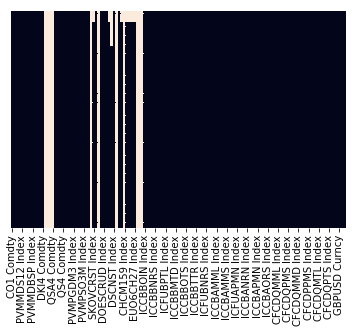

In [95]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [96]:
df.dropna(axis='columns',inplace=True)

In [103]:
#df.to_excel('prepdata.xlsx')

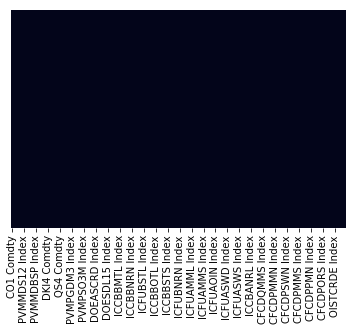

In [98]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [99]:
new_df = df.iloc[1:,:]

In [100]:
new_df.astype(float).corr()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
CO1 Comdty,1.000000e+00,9.981530e-01,9.951557e-01,9.916205e-01,4.110543e-01,4.838198e-01,4.355281e-01,4.927176e-01,4.779581e-01,9.379027e-01,...,1.346782e-01,-5.201635e-01,5.627975e-01,2.215830e-01,3.680108e-01,3.073209e-01,3.453420e-01,1.777406e-01,1.327080e-01,-2.620230e-01
CO2 Comdty,9.981530e-01,1.000000e+00,9.991740e-01,9.972700e-01,3.700767e-01,4.445679e-01,3.952495e-01,4.525495e-01,4.468039e-01,9.410814e-01,...,1.434601e-01,-5.421694e-01,5.317256e-01,2.170011e-01,4.020103e-01,3.142885e-01,3.458437e-01,1.675969e-01,1.295748e-01,-2.843618e-01
CO3 Comdty,9.951557e-01,9.991740e-01,1.000000e+00,9.994234e-01,3.399827e-01,4.143654e-01,3.655998e-01,4.219038e-01,4.214405e-01,9.428409e-01,...,1.453920e-01,-5.545423e-01,5.086052e-01,2.108285e-01,4.284195e-01,3.260286e-01,3.405550e-01,1.549304e-01,1.222963e-01,-3.029560e-01
CO4 Comdty,9.916205e-01,9.972700e-01,9.994234e-01,1.000000e+00,3.171185e-01,3.892894e-01,3.432921e-01,3.967060e-01,3.997297e-01,9.446699e-01,...,1.422459e-01,-5.612841e-01,4.897746e-01,2.012402e-01,4.493885e-01,3.394793e-01,3.324930e-01,1.389567e-01,1.113787e-01,-3.216356e-01
PVMMDS12 Index,4.110543e-01,3.700767e-01,3.399827e-01,3.171185e-01,1.000000e+00,9.016153e-01,9.766150e-01,8.993436e-01,4.235395e-01,4.001711e-01,...,-3.054744e-01,3.132822e-01,6.187140e-01,2.130866e-02,-3.809874e-01,2.523618e-02,-6.362957e-02,-1.023826e-01,-2.329965e-01,4.918814e-02
PVMMDS23 Index,4.838198e-01,4.445679e-01,4.143654e-01,3.892894e-01,9.016153e-01,1.000000e+00,8.675313e-01,9.668484e-01,4.578288e-01,3.785441e-01,...,-1.848299e-01,2.198465e-01,5.737318e-01,7.285585e-02,-3.793326e-01,-2.571047e-02,6.734676e-03,1.050582e-01,-5.250748e-02,2.103094e-01
PVMMD2M3 Index,4.355281e-01,3.952495e-01,3.655998e-01,3.432921e-01,9.766150e-01,8.675313e-01,1.000000e+00,9.060044e-01,4.466059e-01,4.291259e-01,...,-3.014301e-01,2.819624e-01,6.531379e-01,4.820236e-02,-3.517819e-01,3.311232e-02,-3.491408e-02,-9.695082e-02,-2.277587e-01,3.054296e-02
PVMMD3M4 Index,4.927176e-01,4.525495e-01,4.219038e-01,3.967060e-01,8.993436e-01,9.668484e-01,9.060044e-01,1.000000e+00,4.961753e-01,3.934537e-01,...,-1.768817e-01,2.040073e-01,6.284309e-01,1.055463e-01,-3.597697e-01,-2.726179e-02,4.247957e-02,1.065336e-01,-4.846671e-02,2.094148e-01
PVMMDBSP Index,4.779581e-01,4.468039e-01,4.214405e-01,3.997297e-01,4.235395e-01,4.578288e-01,4.466059e-01,4.961753e-01,1.000000e+00,3.001472e-01,...,4.452953e-01,-4.200456e-01,7.225670e-01,3.773239e-01,-7.004905e-02,-1.237794e-01,6.555183e-01,5.520010e-01,6.136653e-01,4.050985e-01
DKI1 Comdty,9.379027e-01,9.410814e-01,9.428409e-01,9.446699e-01,4.001711e-01,3.785441e-01,4.291259e-01,3.934537e-01,3.001472e-01,1.000000e+00,...,-2.339292e-02,-4.328161e-01,5.017422e-01,9.491754e-02,3.936435e-01,4.221589e-01,1.811366e-01,-3.960565e-02,-8.262781e-02,-4.654318e-01
